In [12]:
#import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#read in csv
df = pd.read_csv("myopia.csv")
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
#check data types
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [4]:
#drop myopic column
nomyodf = df.drop(columns =["MYOPIC"])
nomyodf.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
#check for duplicates
nomyodf.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
613    False
614    False
615    False
616    False
617    False
Length: 618, dtype: bool

In [6]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaleddata = scaler.fit_transform(nomyodf[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']])
scaleddata
#view scaled data
scaleddata_df = pd.DataFrame(scaleddata, columns=nomyodf.columns)
scaleddata_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [7]:
#initialize PCA model w 90% variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90)
scaled_pca = pca.fit_transform(scaleddata_df)

In [8]:
#transform PCA data to a dataframe
pcadf = pd.DataFrame(data=scaled_pca, columns=["PCA1", "PCA2", "PCA3", "PCA4","PCA5", "PCA6", "PCA7", "PCA8","PCA9", "PCA10"])
pcadf.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [9]:
#fetch explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [10]:
from sklearn.manifold import TSNE
#create new df for TSNE
df2 = df.drop(['MYOPIC'], axis=1)
labels = df['MYOPIC']
#initialize TSNE model
tsne = TSNE(learning_rate = 75)
#reduce dimensions
tsne_features = tsne.fit_transform(pcadf)
tsne_features.shape

C:\Users\allie\anaconda33\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(618, 2)

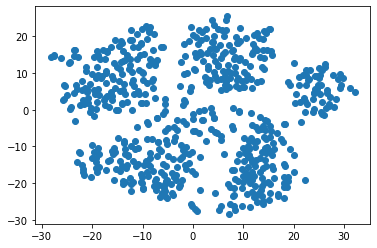

In [11]:
#visualize clusters
pcadf['x'] = tsne_features[:,0]
pcadf['y'] = tsne_features[:,1]
plt.scatter(pcadf['x'], pcadf['y'])
plt.show()

In [16]:
#model data using 10 clusters for the 10 columns 
model = KMeans(n_clusters=10, random_state=1)
#train model
model.fit(pcadf)
#predict clusters
predictions = model.predict(pcadf)
#create return df with predicted clusters
pcadf["class"] = model.labels_
pcadf.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-4.950347,-4.931216,7
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-14.184699,13.097247,6
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,13.862726,-15.738733,3
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,-1.830436,9.821975,2
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,-13.730415,-9.114882,8


In [17]:
inertia = []
k = list(range(1, 11))

#calculate inertia for range of k values
for i in k:
    km = KMeans(n_clusters = i, random_state = 1)
    km.fit(pcadf)
    inertia.append(km.inertia_)
#create elbow curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()

C:\Users\allie\anaconda33\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,257599.932033
1,2,162914.803442
2,3,97034.379476
3,4,67927.164642
4,5,50154.195584


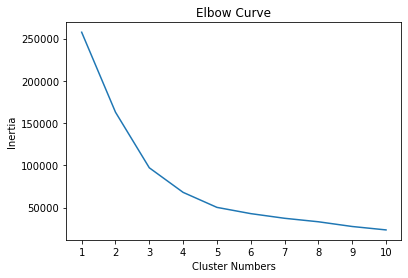

In [18]:
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel("Cluster Numbers")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()

In [19]:
#plateaus around 5 = 5 clusters
model = KMeans(n_clusters=5, random_state=1)
model.fit(pcadf)
predictions = model.predict(pcadf)

In [23]:
def get_clusters(k, data):
    #initialize k-means model
    model = KMeans(n_clusters=k, random_state=1)
    #train model
    model.fit(pcadf)
    #predict clusters
    predictions = model.predict(pcadf)
    #create return df with predicted clusters
    pcadf["class"] = model.labels_
    return pcadf

In [24]:
#analyzing clusters w best value of k
clusters = get_clusters(5, pcadf)
clusters

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-4.950347,-4.931216,3
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-14.184699,13.097247,0
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,13.862726,-15.738733,2
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,-1.830436,9.821975,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,-13.730415,-9.114882,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996,-8.849201,-3.836250,3
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105,-13.895020,13.187981,0
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777,-12.431203,13.918806,0
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581,15.257887,-22.595114,2


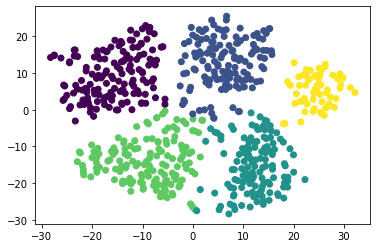

In [25]:
#plot 5 clustered data
def show_clusters(df):
    plt.scatter(pcadf['x'], pcadf['y'], c=pcadf["class"])
    plt.show()

show_clusters(clusters)

In [28]:
print('Patients can be clustered into 5 groups.')

Patients can be clustered into 5 groups.
